In [1]:
import pickle
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
#print(tf.version)
import bz2
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
import seaborn as sns
import itertools
warnings.filterwarnings('ignore')

In [2]:
import os
import os.path
from glob import glob
import random
import shutil
from tqdm.auto import tqdm
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorboard.plugins.hparams import api as hp
from sklearn.model_selection import train_test_split
#from kerashypetune import KerasGridSearch

In [3]:
def FIPS_function(row):
    state = str(row['stateFip']).zfill(2)
    county = str(row['countyFip']).zfill(3)
    return str(state + county)

### --- Note ---
- Original load, but I used different dfs throughout on different parts.
- Wanted to make sure I was doing it correctly before I ran on the whole

In [4]:
bz_file = bz2.BZ2File("feeFiFoFum.pbz2",'rb')
df = pd.read_pickle(bz_file)
df.head()

,dates,JHU_ConfirmedCases.data,NYT_ConfirmedCases.data,JHU_ConfirmedDeaths.data,NYT_ConfirmedDeaths.data,NYT_ConfirmedDeaths.missing,TotalPopulation.data,MaleAndFemale_AtLeast65_Population.data,Male_Total_Population.data,Female_Total_Population.data,...,healthInsNativeWith,healthInsForeignNatWith,healthInsForeignNoncitWith,healthInsForeignNatNo,healthInsForeignNoncitNo,healthInsNativeNo,countyStateName,stateFip,countyFip,pm25
0,2020-03-19,1.0,1.0,0.0,0.0,0,24527.0,5343.0,11868.0,12673.0,...,21415,179,87,39,122,2555,"Abbeville County, South Carolina",45,001,9.618551
1,2020-03-20,1.0,1.0,0.0,0.0,0,24527.0,5343.0,11868.0,12673.0,...,21415,179,87,39,122,2555,"Abbeville County, South Carolina",45,001,9.618551
2,2020-03-21,1.0,1.0,0.0,0.0,0,24527.0,5343.0,11868.0,12673.0,...,21415,179,87,39,122,2555,"Abbeville County, South Carolina",45,001,9.618551
3,2020-03-22,1.0,1.0,0.0,0.0,0,24527.0,5343.0,11868.0,12673.0,...,21415,179,87,39,122,2555,"Abbeville County, South Carolina",45,001,9.618551
4,2020-03-23,1.0,1.0,0.0,0.0,0,24527.0,5343.0,11868.0,12673.0,...,21415,179,87,39,122,2555,"Abbeville County, South Carolina",45,001,9.618551


In [5]:
### Drop non-numeric and unnecessary columns
cols = ['NYT_ConfirmedCases.data','NYT_ConfirmedDeaths.data','NYT_ConfirmedDeaths.missing','county','LND110210','countyStateName','stateFip','countyFip']
df.drop(cols, axis=1, inplace=True)

## --------- Update EDA ----------

- I can do some plots, and then suggestions for other EDA i could include???
- I think I can run it on the entire dataset, it just takes a while and wanted to make sure it   was right before I did it

In [6]:
print(df.shape); print(1879589/10000)

(1879589, 88)
187.9589


In [7]:
1879589/2

939794.5

In [8]:
##function for above and below a threshold

def get_above_threshold(dff,thresh):
    corr_mtrx = dff.corr()
    corr_vals = corr_mtrx.values
    flds = list(corr_mtrx.columns)
    numCols = corr_mtrx.shape[0]
    above_threshold = []
    
    for i in range(numCols):
        for j in range(i+1, numCols):
            if corr_vals[i,j] > thresh:
                if i != j:
                    above_threshold.append([flds[i],flds[j],corr_vals[i,j]])
    above_threshold.sort(reverse=True)
    return above_threshold

def get_below_threshold(dff,thresh):
    corr_mtrx = dff.corr()
    corr_vals = corr_mtrx.values
    flds = list(corr_mtrx.columns)
    numCols = corr_mtrx.shape[0]
    above_threshold = []
    
    for i in range(numCols):
        for j in range(i+1, numCols):
            if corr_vals[i,j] < thresh:
                if i != j:
                    above_threshold.append([flds[i],flds[j],corr_vals[i,j]])
    above_threshold.sort(reverse=True)
    return above_threshold

In [9]:
## raw correlations
df_raw_corrs = get_above_threshold(df,0.9)
df_raw_corrs[0:10]

[['unitsInStructure', 'healthInsTotal', 0.994129629869046],
 ['unitsInStructure', 'healthInsNativeWith', 0.9949704848079665],
 ['totalTrans', 'unitsInStructure', 0.9929803019216017],
 ['totalTrans', 'householdsTotal', 0.9963845175005094],
 ['totalTrans', 'householdStructuresTotal', 0.9963845175005094],
 ['totalTrans', 'houseWith65', 0.9808301889300902],
 ['totalTrans', 'houseNonfamNo65', 0.9649106176366248],
 ['totalTrans', 'houseNonfam65', 0.9476931509873331],
 ['totalTrans', 'houseNo65', 0.9961388201760542],
 ['totalTrans', 'houseFamilyNo65', 0.9969163007655882]]

In [10]:
### pca here or after conversions?

#pca = PCA(n_components=2)
#principalComponents = pca.fit_transform(x_p)
#principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1','pc2'])

# ------------- Clean up -----------
- Followed Noah's notebook
- back to original dataset for clean up

In [11]:
### Temporarily, replace FIPS codes with latitude and longitude of the centroid of each county
counties = pd.read_csv('2021_Gaz_counties_national.txt', delimiter='\t')
counties.rename(columns={'INTPTLONG                                                                                                               ': 'longitude',
                        'INTPTLAT': 'latitude'}, inplace=True)

counties = counties[['GEOID', 'latitude', 'longitude' ]]
df.fips = df.fips.astype('int64')

df = df.merge(counties, how='left', left_on='fips', right_on='GEOID')
df.drop(['GEOID'], axis=1, inplace=True)

### Replace dates with monotonically increasing integers starting with the minimum date
df.dates = pd.to_datetime(df.dates, format='%Y-%m-%d')
min_date = min(df.dates)
max_date = max(df.dates)
print(min_date, max_date, df.dates.dtype)
df['day'] =(df.dates - min_date).dt.days
df.drop(['dates'], axis=1, inplace=True)

###Replace the integer representation of date with sin and cosine encoding

cyclical_interval = 365
continuous_interval = 3650
df['cyclical_sin'] = np.sin((df.day * 2 * np.pi)/cyclical_interval)
df['cyclical_cos'] = np.cos((df.day * 2 * np.pi)/cyclical_interval)
df['continuous_sin'] = np.sin((df.day * 2 * np.pi)/continuous_interval)
df['continuous_cos'] = np.cos((df.day * 2 * np.pi)/continuous_interval)
df.drop('day', axis=1, inplace=True)

2020-03-11 00:00:00 2022-01-16 00:00:00 datetime64[ns]


In [12]:
###Get the feature column for latitude and longitude
# crossed_latlong = pp.get_latlong_fc(df)

lat_buckets = list(np.linspace(df.latitude.min(), df.latitude.max(),100))
long_buckets = list(np.linspace(df.longitude.min(), df.longitude.max(),100))

#make feature columns
lat_fc = tf.feature_column.bucketized_column(tf.feature_column.numeric_column('latitude'),lat_buckets)
long_fc= tf.feature_column.bucketized_column(tf.feature_column.numeric_column('longitude'),long_buckets)
    
# crossed columns tell the model how the features relate
crossed_latlong = tf.feature_column.crossed_column(keys=[lat_fc, long_fc], hash_bucket_size=1000) # No precise rule, maybe 1000 buckets will be good?
    
embedded_latlong = tf.feature_column.embedding_column(crossed_latlong,9)

feature_layer = tf.keras.layers.DenseFeatures(embedded_latlong)

df[['geo0', 'geo1', 'geo2','geo3', 'geo4','geo5','geo6','geo7','geo8']] = feature_layer({'latitude': df.latitude, 'longitude': df.longitude})

# df.drop(['longitude', 'latitude'], axis=1, inplace=True)

In [13]:
### normalize the data
cols_to_normalize = [
       'TotalPopulation.data', 'MaleAndFemale_AtLeast65_Population.data',
       'Male_Total_Population.data', 'Female_Total_Population.data',
       'MaleAndFemale_Under18_Population.data', 'BLS_EmployedPopulation.data',
       'BLS_EmployedPopulation.missing', 'BLS_UnemployedPopulation.data',
       'BLS_UnemployedPopulation.missing', 'BLS_UnemploymentRate.data',
       'BLS_UnemploymentRate.missing', 'BLS_LaborForcePopulation.data',
       'BLS_LaborForcePopulation.missing', 'AverageDailyTemperature.data',
       'AverageDailyTemperature.missing', 'AverageDewPoint.data',
       'AverageDewPoint.missing', 'AverageRelativeHumidity.data',
       'AverageRelativeHumidity.missing', 'AverageSurfaceAirPressure.data',
       'AverageSurfaceAirPressure.missing', 'AveragePrecipitationTotal.data',
       'AveragePrecipitationTotal.missing', 'AveragePrecipitation.data',
       'AveragePrecipitation.missing', 'AverageWindDirection.data',
       'AverageWindDirection.missing', 'AverageWindSpeed.data',
       'AverageWindSpeed.missing', 'hospitalIcuBeds', 'hospitalStaffedBeds',
       'hospitalLicensedBeds', 'latestTotalPopulation', 'jhu_daily_death',
       'jhu_daily_cases', 'jhu_daily_new_cases', 
    'jhu_daily_death_rolling_7',
       'jhu_daily_cases_rolling_7', 'jhu_daily_new_cases_rolling_7',
       'jhu_daily_death_rolling_30', 'jhu_daily_cases_rolling_30',
       'jhu_daily_new_cases_rolling_30', 'jhu_death_rate', 'jhu_case_rate',
       'jhu_new_case_rate', 'density', 'icu_beds_per_person',
       'staffed_beds_per_person', 'licensed_beds_per_person', 'cold_days',
       'hot_days', 'moderate_days', 'gte_65_percent', 'lt_18_percent',
       'employed_percent', 'unemployed_percent', 'totalMoved',
       'movedWithinState', 'movedWithoutState', 'movedFromAbroad',
       'publicTrans', 'totalTrans', 'householdsTotal', 'houseWith65',
       'house2+with65', 'houseFamily65', 'houseNonfam65', 'houseNo65',
       'house2+No65', 'houseFamilyNo65', 'houseNonfamNo65',
       'householdStructuresTotal', 'householdIncomeMedian', 'gini',
       'hoursWorkedMean', 'unitsInStructure', 'healthInsTotal',
       'healthInsNativeWith', 'healthInsForeignNatWith',
       'healthInsForeignNoncitWith', 'healthInsForeignNatNo',
       'healthInsForeignNoncitNo', 'healthInsNativeNo', 'pm25', 'latitude',
       'longitude']
cols_raw = ['fips','JHU_ConfirmedCases.data', 'JHU_ConfirmedDeaths.data', 'cyclical_sin', 'cyclical_cos', 'continuous_sin',
       'continuous_cos', 'geo0', 'geo1', 'geo2','geo3', 'geo4','geo5','geo6','geo7','geo8']
df_normalized = df[cols_to_normalize]
df_normalized = (df_normalized - df_normalized.mean())/df_normalized.std()
df_raw = df[cols_raw]
df = pd.concat([df_raw, df_normalized], axis=1)

In [14]:
print(df.shape); df.head(2)

(1879589, 102)


,fips,JHU_ConfirmedCases.data,JHU_ConfirmedDeaths.data,cyclical_sin,cyclical_cos,continuous_sin,continuous_cos,geo0,geo1,geo2,...,healthInsTotal,healthInsNativeWith,healthInsForeignNatWith,healthInsForeignNoncitWith,healthInsForeignNatNo,healthInsForeignNoncitNo,healthInsNativeNo,pm25,latitude,longitude
0,45001,1.0,0.0,0.137279,0.990532,0.013771,0.999905,-0.008167,0.151876,-0.164822,...,-0.235997,-0.262976,-0.137842,-0.148042,-0.143646,-0.141956,-0.196056,0.811931,-0.830256,0.80029
1,45001,1.0,0.0,0.154309,0.988023,0.015492,0.999880,-0.008167,0.151876,-0.164822,...,-0.235997,-0.262976,-0.137842,-0.148042,-0.143646,-0.141956,-0.196056,0.811931,-0.830256,0.80029


# ----------- PCA -------------
- need to run on the entirety of it 
- df_pca is used throughout the pca portion

In [15]:
###https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

#df_pca = df.copy() # if ran on the whole, it returns:
 # ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
    
df_pca = df.head(939794) #half
print(df_pca.shape)

### PCA
target = 'JHU_ConfirmedCases.data'
features = list(df_pca.columns); features.remove(target)
feature_columns = [tf.feature_column.numeric_column(i) for i in features]

x_p = df_pca.loc[:, features].values
x_p = StandardScaler().fit_transform(x_p)
y_p = df_pca.loc[:,[target]].values

pca = PCA(n_components=0.95)
principalComponents = pca.fit_transform(x_p)
principalDf = pd.DataFrame(data = principalComponents)

finalDf = pd.concat([principalDf, df_pca[[target]]], axis = 1)
finalDf.head(3)

(939794, 102)


,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,JHU_ConfirmedCases.data
0,-1.640641,-1.055009,-1.455177,-0.520824,0.406486,0.480722,0.125168,-0.337877,-0.640319,-0.553381,...,-0.142045,0.130110,0.501689,-0.698604,1.109730,-1.686129,-0.322436,0.003316,-1.039747,1.0
1,-1.636635,-0.956706,-1.350717,-0.506024,0.123140,0.480542,0.236734,-0.184858,-0.054646,-0.478891,...,-0.115545,0.169004,0.568634,-0.849584,1.367345,-1.427543,-0.126986,-0.184188,-1.009659,1.0
2,-1.636802,-0.869672,-1.254741,-0.457528,0.042677,0.548637,0.245740,-0.172257,-0.114805,-0.491030,...,-0.113319,0.193466,0.634689,-0.864518,1.420159,-1.331028,-0.082880,-0.357216,-0.816644,1.0


In [16]:
var_expln = list(pca.explained_variance_ratio_)
var_expln.sort(reverse=True)
var_expln[0:5]

[0.36087999385142866,
 0.061481371793262116,
 0.051814411959314584,
 0.0435960410339256,
 0.03522512265833085]

Text(0, 0.5, 'pc-2')

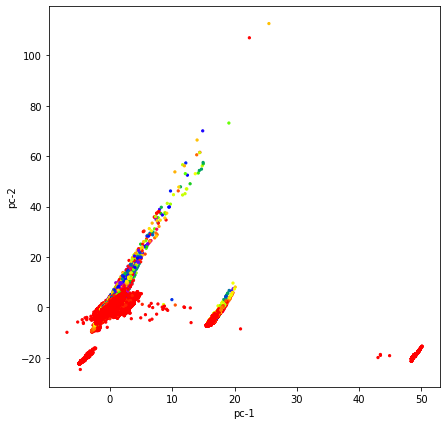

In [17]:
plt.figure(figsize=(7,7))
plt.scatter(finalDf[1],finalDf[2],c=finalDf['JHU_ConfirmedCases.data'],cmap='prism', s =5)
plt.xlabel('pc-1')
plt.ylabel('pc-2')

Text(0, 0.5, 'pc-4')

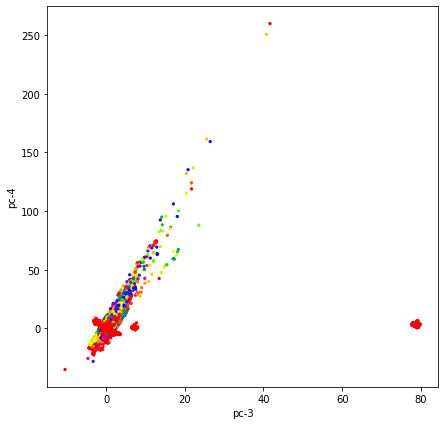

In [18]:
plt.figure(figsize=(7,7))
plt.scatter(finalDf[3],finalDf[4],c=finalDf['JHU_ConfirmedCases.data'],cmap='prism', s =5)
plt.xlabel('pc-3')
plt.ylabel('pc-4')

### another look at correlation
- used pca_df since it was smaller til i make sure it's right

In [19]:
## correlations

df_corrs = get_above_threshold(df,0.9)
df_corrs[0:10]

[['unitsInStructure', 'healthInsTotal', 0.9941296298690643],
 ['unitsInStructure', 'healthInsNativeWith', 0.9949704848081234],
 ['totalTrans', 'unitsInStructure', 0.9929803019216314],
 ['totalTrans', 'householdsTotal', 0.9963845175006059],
 ['totalTrans', 'householdStructuresTotal', 0.9963845175006059],
 ['totalTrans', 'houseWith65', 0.9808301889300108],
 ['totalTrans', 'houseNonfamNo65', 0.9649106176366371],
 ['totalTrans', 'houseNonfam65', 0.9476931509873973],
 ['totalTrans', 'houseNo65', 0.9961388201760928],
 ['totalTrans', 'houseFamilyNo65', 0.9969163007657244]]

#### extra not needed, article just continued with this stuff

# ------- linear regression / baseline ------
- need to run on whole dataset and separate 1 day every 30 for x/y

## took a different approach to building the datasets, but lmk if it's off
- https://www.guru99.com/linear-regression-tensorflow.html

### works, but need to come back and get right x/y 
- need to sort x and y to 30 days to predict 1. Need to run on the entire dataset.

In [20]:
## function to automate that day split, skip to 3rd attempt

def days_to_predict(dff,numDays):
    train = pd.DataFrame(); test = pd.DataFrame()
    numDays = numDays+1

    for i in range(len(dff)):
        if i%numDays == 0:
            test = test.append(dff.loc[[i]], ignore_index = True)
        else:
            train = train.append(dff.loc[[i]], ignore_index = True)
    return train,test

def days_to_predict2(dff,numDays):
    index_len = dff.shape[0]
    numDays = numDays+1
    train = pd.DataFrame()
    test = dff[0:index_len:numDays]
    
    for i in range(index_len):
        if i%numDays != 0:
            train.append(dff.loc[[i]], ignore_index = True)
    
    return train,test

### both took too long

In [21]:
def days_to_predict3(dff,numDays):
    ##round decimals since it's too long or to big
    ##get an error if i run it as a whole
    #dff = dff.apply(lambda row : round(row, 2)) 
    index_len = dff.shape[0]
    numDays = numDays+1
    test = dff[0:index_len:numDays]; train_lst=[]
    
    for i in range(df.shape[0]):
        if i%numDays!=0:
            train_lst.append(i)       
    train = pd.DataFrame(dff, index = train_lst)
    
    return train,test

In [22]:
### rounding down decimals to see if i can run on the hole
# dff = df.apply(lambda row : round(row,5))
# halff = dff.shape[0]/2
# dff.replace([np.inf, -np.inf], np.nan, inplace=True)

In [23]:
##using rounded dataframe
train_df, test_df = days_to_predict3(df,30)

In [24]:
train_df.head(3)

,fips,JHU_ConfirmedCases.data,JHU_ConfirmedDeaths.data,cyclical_sin,cyclical_cos,continuous_sin,continuous_cos,geo0,geo1,geo2,...,healthInsTotal,healthInsNativeWith,healthInsForeignNatWith,healthInsForeignNoncitWith,healthInsForeignNatNo,healthInsForeignNoncitNo,healthInsNativeNo,pm25,latitude,longitude
1,45001,1.0,0.0,0.154309,0.988023,0.015492,0.999880,-0.008167,0.151876,-0.164822,...,-0.235997,-0.262976,-0.137842,-0.148042,-0.143646,-0.141956,-0.196056,0.811931,-0.830256,0.80029
2,45001,1.0,0.0,0.171293,0.985220,0.017213,0.999852,-0.008167,0.151876,-0.164822,...,-0.235997,-0.262976,-0.137842,-0.148042,-0.143646,-0.141956,-0.196056,0.811931,-0.830256,0.80029
3,45001,1.0,0.0,0.188227,0.982126,0.018934,0.999821,-0.008167,0.151876,-0.164822,...,-0.235997,-0.262976,-0.137842,-0.148042,-0.143646,-0.141956,-0.196056,0.811931,-0.830256,0.80029


In [25]:
test_df.head(3)

,fips,JHU_ConfirmedCases.data,JHU_ConfirmedDeaths.data,cyclical_sin,cyclical_cos,continuous_sin,continuous_cos,geo0,geo1,geo2,...,healthInsTotal,healthInsNativeWith,healthInsForeignNatWith,healthInsForeignNoncitWith,healthInsForeignNatNo,healthInsForeignNoncitNo,healthInsNativeNo,pm25,latitude,longitude
0,45001,1.0,0.0,0.137279,0.990532,0.013771,0.999905,-0.008167,0.151876,-0.164822,...,-0.235997,-0.262976,-0.137842,-0.148042,-0.143646,-0.141956,-0.196056,0.811931,-0.830256,0.80029
31,45001,17.0,0.0,0.622047,0.782980,0.067085,0.997747,-0.008167,0.151876,-0.164822,...,-0.235997,-0.262976,-0.137842,-0.148042,-0.143646,-0.141956,-0.196056,0.811931,-0.830256,0.80029
62,45001,36.0,0.0,0.933837,0.357698,0.120208,0.992749,-0.008167,0.151876,-0.164822,...,-0.235997,-0.262976,-0.137842,-0.148042,-0.143646,-0.141956,-0.196056,0.811931,-0.830256,0.80029


In [26]:
def input_fn(dataset, batch_size=128, num_epochs=None, shuffle=True):
    return tf.compat.v1.estimator.inputs.pandas_input_fn(
    x = dataset[features],
    y = dataset[target],
    batch_size=batch_size,
    num_epochs=num_epochs,
    shuffle=shuffle )

In [27]:
## https://www.h2kinfosys.com/blog/linear-regression-using-tensorflow-with-examples/
target = 'JHU_ConfirmedCases.data'
features = list(df.columns); features.remove(target)
feature_columns = [tf.feature_column.numeric_column(i) for i in features]

estimator = tf.estimator.LinearRegressor(feature_columns=feature_columns, model_dir='LinRegTrain')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'LinRegTrain', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [28]:
#train the model with 2000 steps
estimator.train(input_fn=input_fn(train_df, num_epochs=None), steps=2000)


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from LinRegTrain/model.ckpt-12800
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 12800...
INFO:tensorflow:Saving c

In [29]:
#evaluate the model
ev = estimator.evaluate(input_fn=input_fn(test_df, num_epochs=10, shuffle=True))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-02-19T06:36:12Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from LinRegTrain/model.ckpt-14800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 95.92779s
INFO:tensorflow:Finished evaluation at 2022-02-19-06:37:48
INFO:tensorflow:Saving dict for global step 14800: average_loss = nan, global_step = 14800, label/mean = 6895.043, loss = nan, prediction/mean = nan
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 14800: LinRegTrain/model.ckpt-14800


In [30]:
train_df[target].describe()

count    1.818957e+06
mean     6.898406e+03
std      2.989528e+04
min      0.000000e+00
25%      2.230000e+02
50%      1.232000e+03
75%      4.206000e+03
max      2.257502e+06
Name: JHU_ConfirmedCases.data, dtype: float64

In [31]:
loss_score = ev["loss"]
print("Loss: {0:f}".format(loss_score))

Loss: nan


In [32]:
### is this suppuse to go where it is in the line below??
test_df.shape[1]

102

In [33]:
y_pred_df = estimator.predict(input_fn=input_fn(test_df,num_epochs=None))
predictions = list(p["predictions"] for p in itertools.islice(y_pred_df, test_df.shape[0]))
#print("Predictions: {}".format(str(predictions)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from LinRegTrain/model.ckpt-14800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [34]:
ypred_df = [x[0] for x in predictions]
ypred_df[0:5]

[2854.8914, 4876.688, 2483.334, 1581.4907, 4454.39]

In [36]:
### turned zero's into means
import statistics

y_true = list(test_df[target].values)
ymean = statistics.mean(y_true)
y_true = pd.DataFrame(y_true)

y_pred = pd.DataFrame(ypred_df)
y_pred.where(y_pred.notnull(),ymean,inplace=True)


In [37]:
from sklearn.metrics import mean_absolute_error as mae
MAE = mae(y_true,y_pred)
print(MAE)

7728.641283159654


Text(0, 0.5, 'ypred')

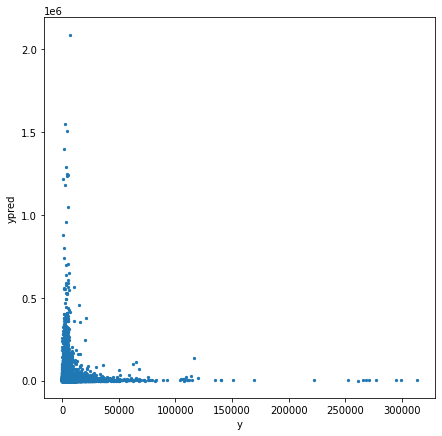

In [38]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred,y_true,s =5, cmap='prism')
plt.xlabel('y')
plt.ylabel('ypred')

In [39]:
print('done')

done
